In [1]:
import pandas as pd
import numpy as np

# Information Retrieval - Elliot Linsey QMUL 2022

## What is IR?

This is a subject focusing on extracting information and knowledge from data using search queries. 

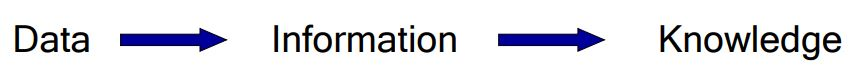

In this case, the data is 'unstructured' and therefore needs different methods for information to be extracted from this raw data. From here, the information is then processed to produce knowledge. 

IR is the ability to sift through this unstructured data to find relevant documents related to the user's search query. 

Unstructured data can be of many different types, such as: 

* Text (Documents)
* XML and structured documents
* Images
* Audio (sound effects, songs, etc.)
* Video
* Source code
* Applications/Web services

### Key Terms:

* term frequency (TF)
* document frequency
* inverse document frequency (IDF)
* vector-space model (VSM)
* probabilistic model
* BM25 (Best-Match Version 25)
* DFR (Divergence from Randomness)
* page rank
* stemming
* precision, recall

### Databases vs IR

We have worked extensively with databases, primarily using modules such as pandas within python. However, the industry standard is SQL which works in a similar manner. Extracting information from a database requires exact queries to be used as the data is stored in a defined structure. Due to this, we also obtain an exact result with no vague or unrelated data being returned. 

Within IR, there is no predefined structure to the data we have querying. Depending on the method and algorithms we utilise this means that we could have different results for the same query, some may be relevant and some may not. These queries are usually informal in contrast to DB searches and are often expressed in natural language. An important part of IR is Natural Language Processing (NLP), in order for the computer to compare queries to the data that it has listed.  

The most common usage of IR is in search engines. Google, Bing, Yahoo etc. 

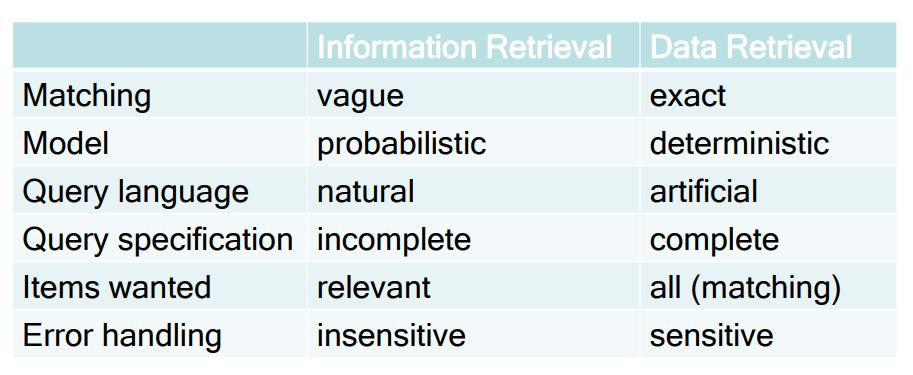

### Information Need

This is the information that you are trying to extract from the data. For example, if you are trying to find a specific type of dog to adopt: 

1. Must be a Labrador
2. Must be Female
3. Must be Golden

The information (document) result should include breed, sex, colour, age, location, cost, health issues etc

The *Query* is the formal representation of this information need. 

### Types of Information Need

**Retrospective ("searching the past")**

Known as "Ad-hoc Querying", this is the instance of posing information queries against a static collection of documents. In this way, the documents are not evolving or expanding and are able to be stored offline. 

**Topical Search:**
* Identify positive results occurring from Napoleon's rule in the 1800s. 
* Compile a list of famous musicians, what instrument they play and number of record sales. 

**Open-ended Exploration:**
* Who has the best guitar tone?
* What types of materials are available for kitchen counters?

**Known-item Search:**
* Find Amazon's home page.
* What is Elliot Linsey's QMUL ID number?

**Question Answering:**
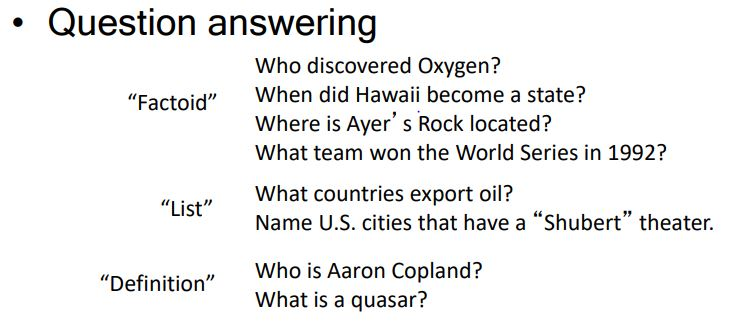

**Prospective Searching**

This is based on more dynamic data which is being created or classed in real time. 

**Filtering:**
* Creating a spam filter that classifies incoming mail as spam or not spam. Binary.

**Multi-class labelling or Classification:**
* Filtering news stories that are posted into bins depending on what type of story they investigate. i.e. if you were only interested in crime news, you could create a filter that will evaluate news stories as they are posted, if they are not crime stories then they are not shown but if they are, you receive a notification etc. 

### Evaluation Methods

Our good friends Precision and Recall are used to evaluate the results of an IR system. In this case, they mean the same as before but are related to *relevance* to our search query. 

Recall: The ability to find all relevant documents to our query (retrieve as few non-relevant documents as possible). If you prioritise recall then there is a chance that non-relevant documents may be returned in the search for all relevant documents. 

Precision: Retrieve the most relevant documents to the query. In this case we may not collect all the relevant documents, but the ones we do collect are more likely to be relevant. 

Recall $\approx$ Completeness

Precision $\approx$ Correctness

There are also a couple of terms related to relevance: 

**Topical Relevance:** Is it about the right thing?

**Situational Relevance:** Is it useful? 

## Information Retrieval Cycle:

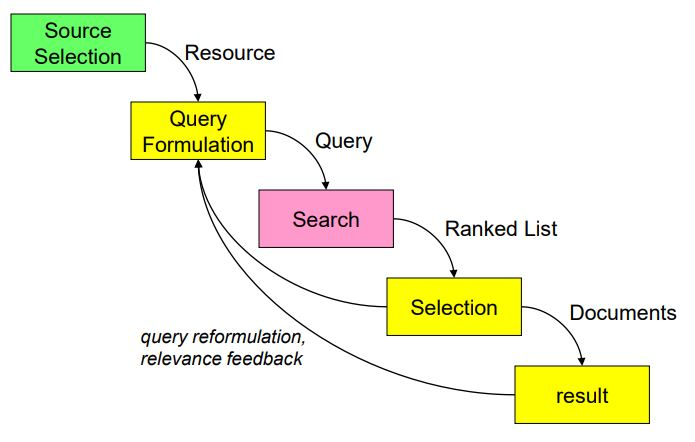

We can see two loops from both the Selection and Result boxes, depending on the effectiveness of our search algorithm we may need to reformulate our query as well as provide relevance feedback to further train our model. 

## Search Process: 

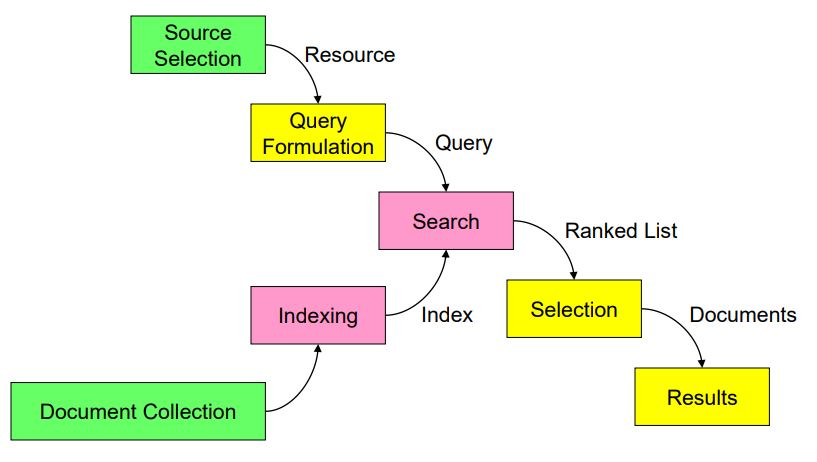

This includes the document collection and indexing process. We can see that the comparison of the search query and index leads to the creation of a ranked list and resulting documents. 

## IR Black Box

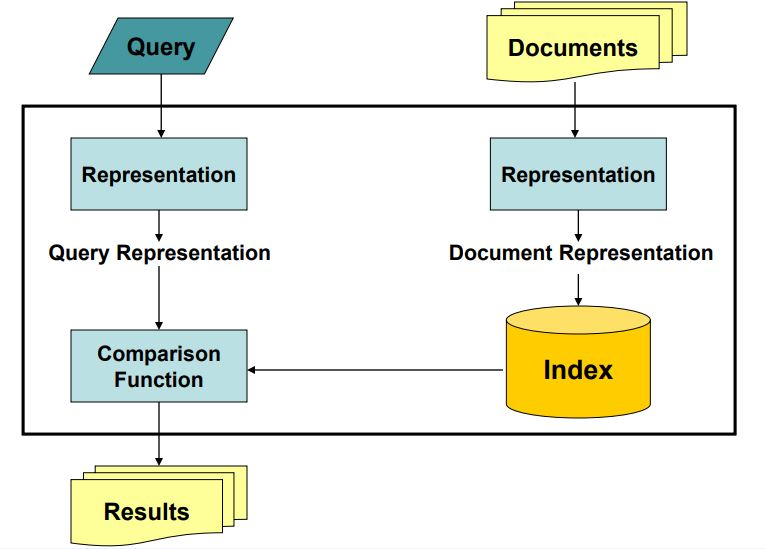

Here we can see the main processes of the IR process. On the left, the search query is inputted by the user in natural language format. The difficulty of IR is processing data from our documents collection into a representable format that can then be made into an index that is compared with our search query in the comparison function. 

## IR Concept

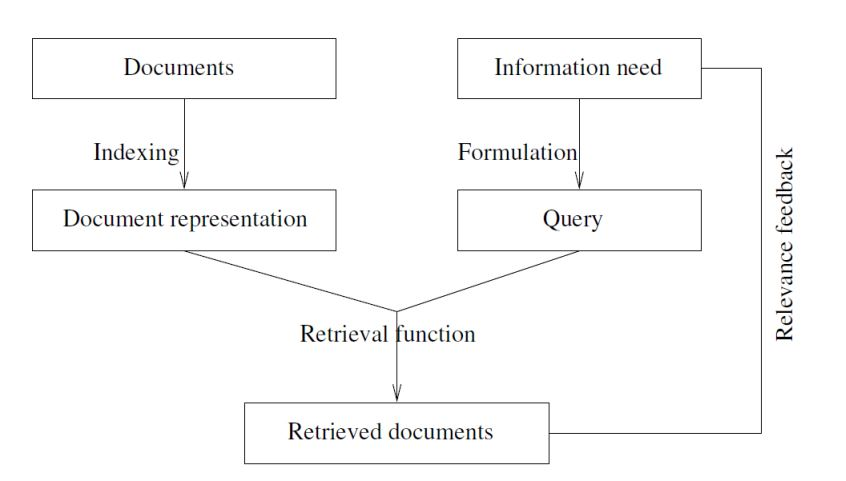

This is very similar to the IR Black Box above, just take note of the Relevance Feedback loop on the right from Retrieved Documents to Information Need.

## Language Issues:

Within the English language there are many different issues that cause natural language processing difficulty. 

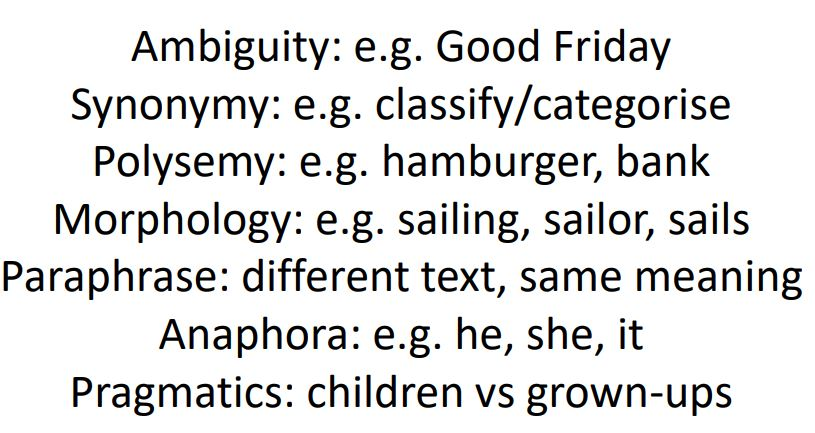

## Representing a Document

A simple but effective method is to use the 'bag of words' representation. We have already covered this in Data Mining but the simple explanation is to remove all stop words and perform stemming etc so that the document is transformed into a count of its key words. We disregard all order and structure and then we can compute the cosine similarity of these different documents with each other to find how similar (or dissimilar) they are to one another.

In [2]:
words = pd.DataFrame(
    [[3,0,5,0,2,6,0,2,0,2],
    [0,7,0,2,1,0,0,3,0,0],
    [0,1,0,0,1,2,2,0,3,0],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1]],
    columns=['team','coach','play','ball','score','game','win','lost','timeout','season'],
    index=['Document 1','Document 2', 'Document 3','Document 4', 'Document 5']
)

words

,team,coach,play,ball,score,game,win,lost,timeout,season
Document 1,3,0,5,0,2,6,0,2,0,2
Document 2,0,7,0,2,1,0,0,3,0,0
Document 3,0,1,0,0,1,2,2,0,3,0
Document 4,1,1,1,1,1,1,1,1,1,1
Document 5,1,1,1,1,1,1,1,1,1,1


Here's the formula for cosine similarity:

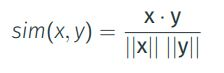

Dissimilarity is simply $1-s$

In [3]:
def cosine_sim(dataset,doc1,doc2):
    doc1 = dataset.loc[doc1].to_numpy()
    doc2 = dataset.loc[doc2].to_numpy()
    return (np.dot(doc1,doc2))/(np.linalg.norm(doc1)*np.linalg.norm(doc2))

print('Similarity = ' + str(cosine_sim(words,'Document 1', 'Document 2')))
print('Dissimilarity = ' + str(1-cosine_sim(words,'Document 1', 'Document 2')))
#cosine_sim(words,'Document 4', 'Document 5')

Similarity = 0.11130451615062428
Dissimilarity = 0.8886954838493757


## Probabilistic Model

Also known as the Query-Likelihood model. This utilises language models to assign a probability to a particular sequence of words. In doing this, we have to create a probability distribution of individual words within our document as well as our collection of documents. This is again the bag of words model as seen above. 

A sequence of words can be assigned a probability of occurring by multiplying their individual probabilities together - this is known as the Unigram model. In this case, we are multiplying the word occurring by document. For example, the probability of the words "team play" occurring in Document 1 below is 3/20 x 5/20.

Written in notation, it is p(team) x p(play). 

In [4]:
words2 = words.copy()
words2['total per document'] = words2.iloc[::].sum(axis=1)
words2.loc['total per word']= words2.sum()
words2

,team,coach,play,ball,score,game,win,lost,timeout,season,total per document
Document 1,3,0,5,0,2,6,0,2,0,2,20
Document 2,0,7,0,2,1,0,0,3,0,0,13
Document 3,0,1,0,0,1,2,2,0,3,0,9
Document 4,1,1,1,1,1,1,1,1,1,1,10
Document 5,1,1,1,1,1,1,1,1,1,1,10
total per word,5,10,7,4,6,10,4,7,5,4,62


For this method of language modeling, there are two primary steps: 

1. Estimating the probability of a word occurring by using the frequency of the word through the documents (create a language model). 
2. Using the language model to assign a probability to a span of text (multiplying the individual probabilities of each word in the language model that appears in the text).

### Topics

We can think of a topic as having a high probability of using certain words and a low probability of using others within a defined language model. In the example below, each different colour represents a different word.

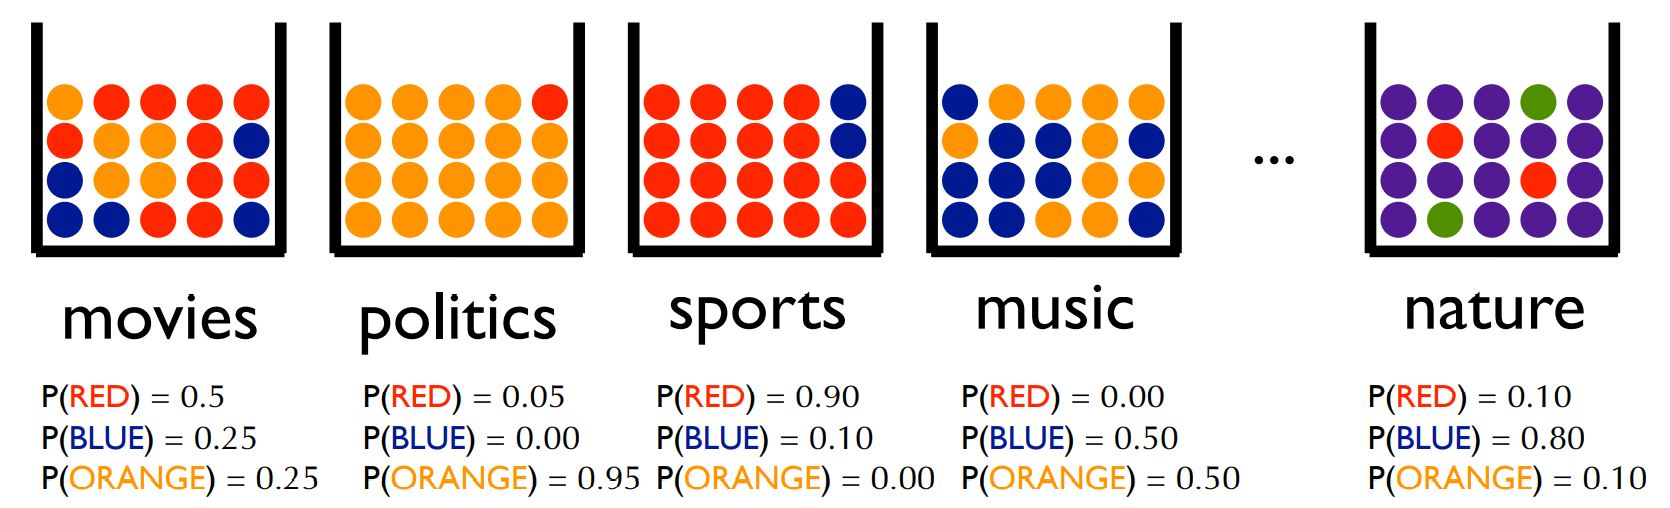

Each document has its own language model, this can be denoted as $\theta D$.

The probability of a given term within a document uses this language model: $P(t|D) = P(t|\theta D)$. An example using document 1 above could be: $P(team|D_1) = 3/20$ which means what is the probability of team occurring given a language model of $D_1$?

For information retrieval, we are ranking each document by how likely it is to have produced our query. Our method of doing this is by generating each document's language model and finding the probability of the terms of our query within each document. The ranking is then ordered in descending order, the higher the probability the more likely the document is to have generated our term. 

To estimate a document's language model:
* Split the document into terms
* Count the number of times each term occurs (term frequency)
* Count the total number of terms within the document ($N_D$)
* Assign term *t* a probability of t = term frequency/$N_D$

Using a generic example of a query for just the word 'team'. We find that $P(team|D_1) = 3/20$ and $P(team|D_4) = 1/10$. Therefore, document 1 is more likely to have generated this query. 

For a query with more than one word, we simply multiply all the probabilities together and then rank each document:

Score(Q,D) = $\Pi^n_{i=1}P(q_i|D)$

As we are multiplying probabilities, the longer the query the lower the probability result. This does not matter as we are evaluating every document *for the same query*. 

### Smoothing

An issue with this method is that if a term does not appear in the document but does appear in the query, then the resulting probability is 0. For example, 0.3 x 0.1 x 0 = 0.

For probabilities, it is common to over-estimate the occurrence of observed outcomes and under-estimate the probability of unobserved outcomes. The goal of smoothing is to reduce the probability of observed outcomes and increase the probability of unobserved outcomes. 

A simple method of smoothing is known as 'Add one' or 'discounting' smoothing. If we take document 1 again, we see that it has a number of terms with 0 occurrences, however the know that these terms exist within the entire *collection* of documents. In order to give a probability value to one of these unobserved terms, we can add an (imaginary) +1 to **every** term within document 1. This both slightly reduces the probability of the observed terms and increases the probability of the unobserved terms, whilst also removing the multiplication by zero issue.   

In [5]:
words2

,team,coach,play,ball,score,game,win,lost,timeout,season,total per document
Document 1,3,0,5,0,2,6,0,2,0,2,20
Document 2,0,7,0,2,1,0,0,3,0,0,13
Document 3,0,1,0,0,1,2,2,0,3,0,9
Document 4,1,1,1,1,1,1,1,1,1,1,10
Document 5,1,1,1,1,1,1,1,1,1,1,10
total per word,5,10,7,4,6,10,4,7,5,4,62


We can see that the P(team|D) probability of 3/20 has now become 4/30 whilst P(coach|D) has gone from 0/20 to 1/30. 

In [6]:
words3 = words.copy()
words3 = words3+1
words3['total per document'] = words3.iloc[::].sum(axis=1)
words3.loc['total per word']= words3.sum()
words3

,team,coach,play,ball,score,game,win,lost,timeout,season,total per document
Document 1,4,1,6,1,3,7,1,3,1,3,30
Document 2,1,8,1,3,2,1,1,4,1,1,23
Document 3,1,2,1,1,2,3,3,1,4,1,19
Document 4,2,2,2,2,2,2,2,2,2,2,20
Document 5,2,2,2,2,2,2,2,2,2,2,20
total per word,10,15,12,9,11,15,9,12,10,9,112


Here's an example using a bag of balls: 

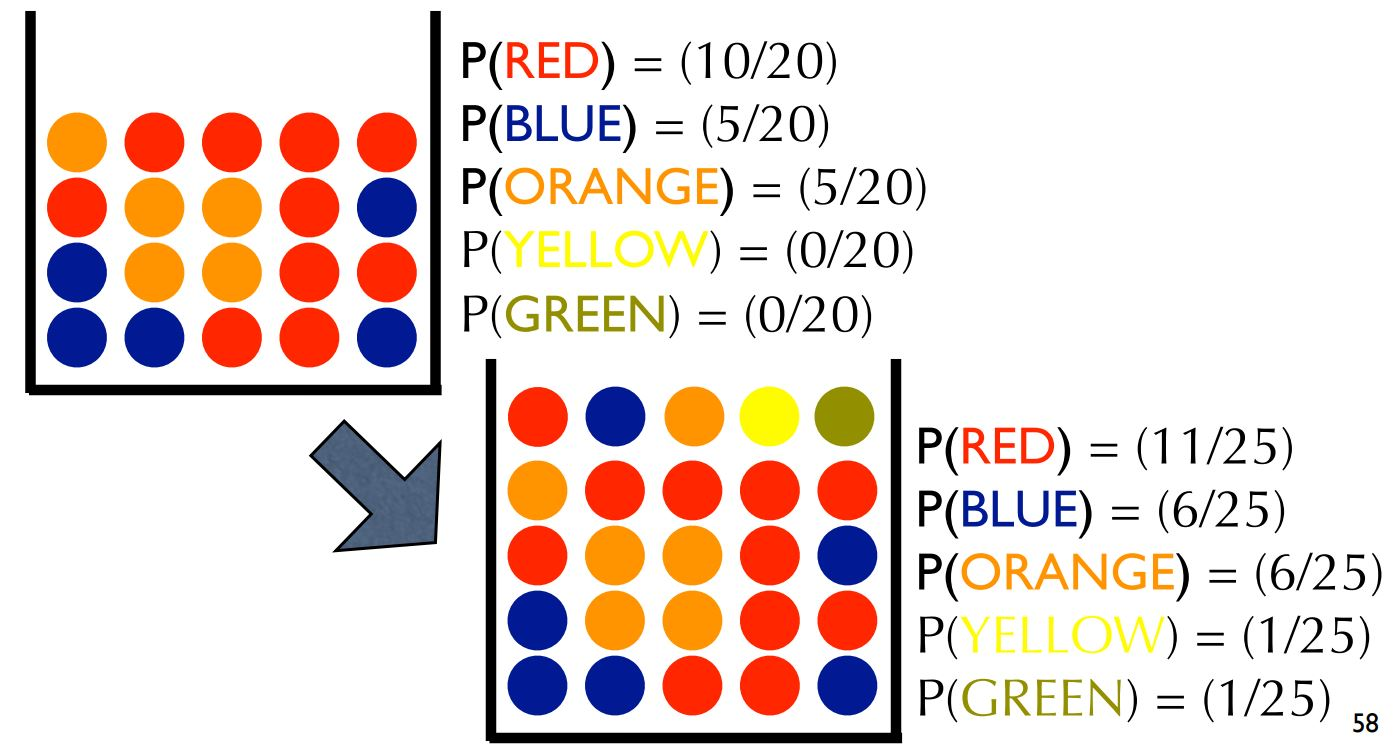

This method is a simple way to add smoothing, however there is a more effective approach.

### Linear Interpolation

This involves using the language model of the **entire collection** of documents, a set alpha value, as well as each document's individual language model. 

$P(t|D) = \alpha P(t|\theta D) + (1-\alpha)P(t|\theta C)$

Every one of these values is between 0 and 1, so the resulting P(t|D) is also between 0 and 1. 

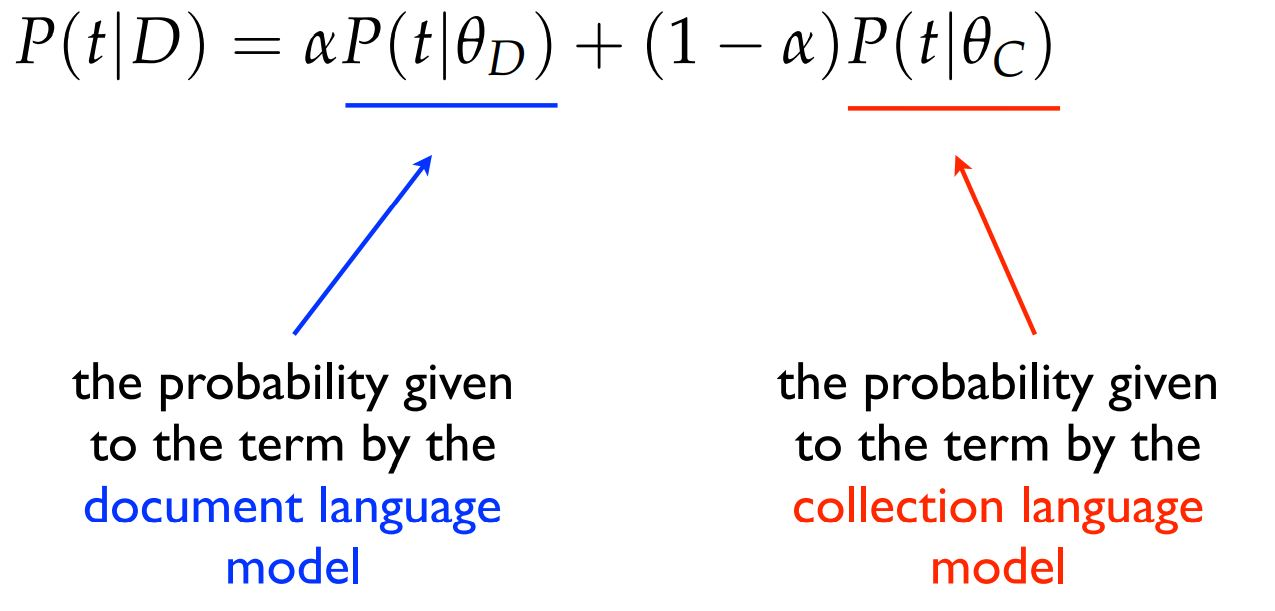

The method of generating the document rankings is the same, just multiplying all the probabilities together. Only this time we use the linear interpolated probabilities. 

Score(Q,D) = $\Pi^n_{i=1} (\alpha P(q_i|\theta D) + (1-\alpha)P(q_i|\theta C))$

Linear interpolation helps us avoid 0 probabilities, I am guessing this is because if a term is not within a document but is in the collection then the probability used is just that of the collection language model. 

A term is descriptive of a document if it appears many times within that document. This is not true if the term appears frequently in the document but also frequently in the **collection**. 

Linear interpolation adds an IDF (inverse document frequency) like feature in that terms that are less frequent in the collection are more important to a document's score, this is not present without smoothing. 

Here's an example with linear interpolation:

Within the collection, both terms have different frequencies.

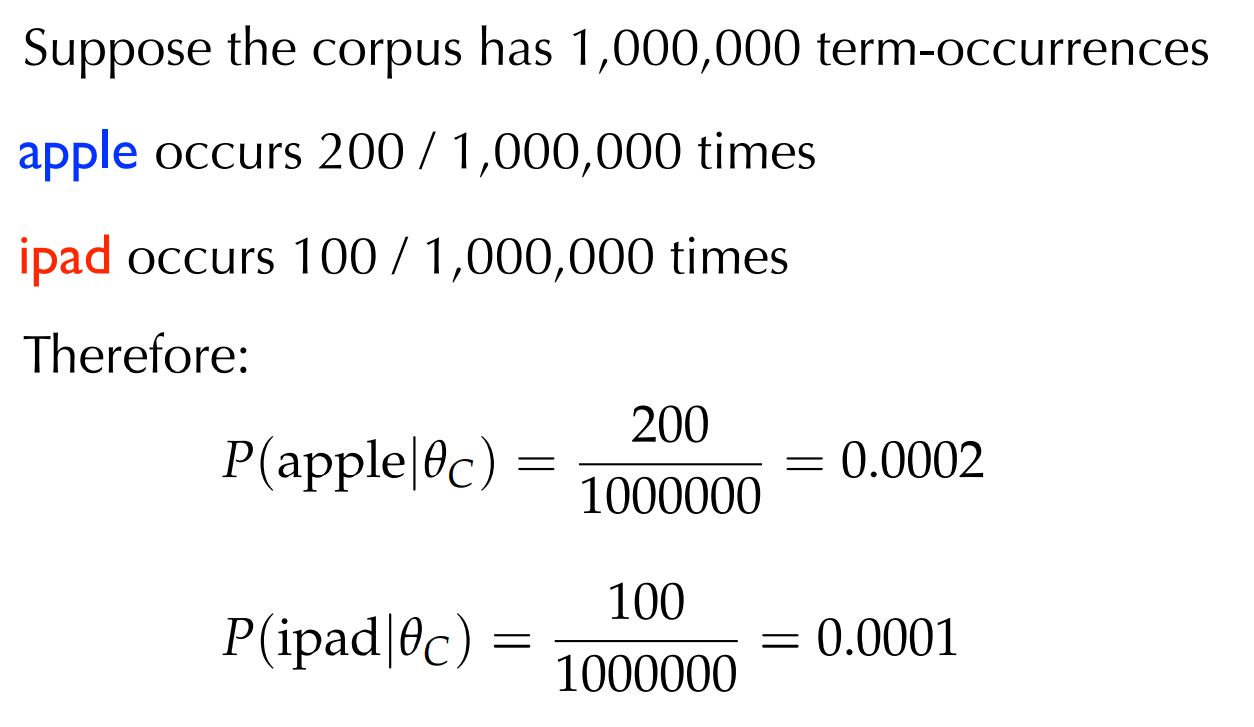

Ignoring the smoothing for now and just using the document language models. If we calculated both p(apple|D) and p(ipad|D) together for both documents (0.04 x 0.06 and 0.06 x 0.04), we would get the same result of 0.0024 and both documents would be ranked the same. 

By taking into account the collection language model and using linear interpolation, we find that both documents are now ranked differently due to the differing importance levels of the terms **overall**. 

The score for document one is calculated by (with an alpha of 0.5): 

$(0.5 \times 0.04 + 0.5 \times 0.0002) \cdot (0.5 \times 0.06 + 0.5 \times 0.0001) = 0.000604005$

The score for document two is calculated by:

$(0.5 \times 0.06 + 0.5 \times 0.0002) \cdot (0.5 \times 0.04 + 0.5 \times 0.0001) = 0.000603505$

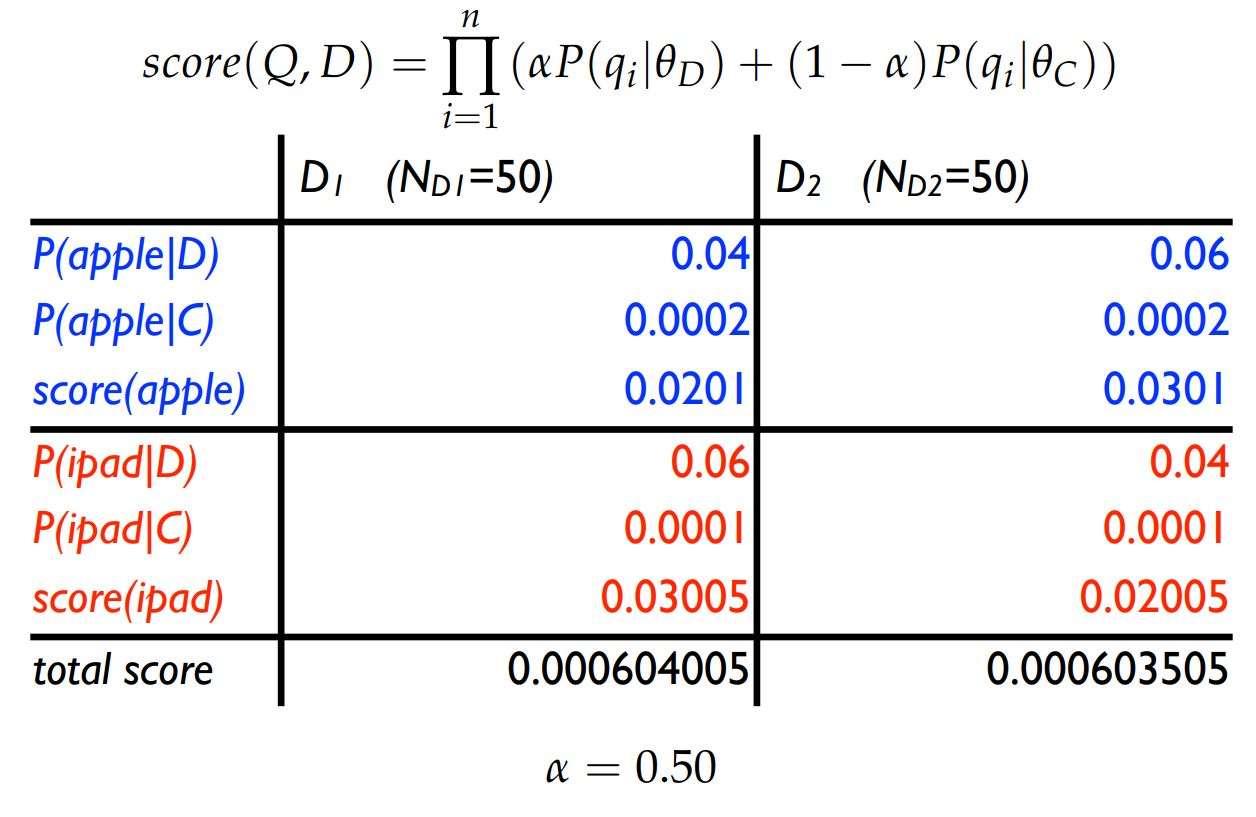

Overall, we can see that even though both terms have the same ranking if we don't use smoothing and just multiply term frequencies, by taking into account the collection language model we can place greater importance on terms that appear **less** in the collection. 

Slightly confused about this. If both apple and ipad had the same term frequency of 0.04. The calculation would be:

(0.5 x 0.04 + 0.5 x 0.0002) x (0.5 x 0.04 + 0.5 x 0.0001) = 0.0201 x 0.02005. Therefore, doesn't apple have the greater impact even though it appears more times in the collection?